In [1]:
# %load adj_functions.sage
# %load adj_functions.sage
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Converts out to complex entries (rather than symbolic)
    A = matrix(CDF, A)
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    n = A.nrows()
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Converts out to complex entries (rather than symbolic)
    A = matrix(CDF, A)
    # Gets idempotents
    idems, evals = idempotents(A)
    # Number of eigenvectors
    n = A.nrows()
    # Zero matrix
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        # Updates transder matrix
        U = U + exp(-I*t*evals[i])*idems[i]
    return U
#     A = matrix(A)
#     return matrix(exp(-1*I*t*A))

################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].real()) < 0.00001:
        return 0
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].imag()) < 0.00001:
        return 0
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].abs() < 0.00001:
        return 0
    return U[i][j].abs()
    
################################################################################
# Function: parallel                                                           #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are parallel                               #
#                                                                              #
################################################################################

def parallel(a,b,idems):
    for M in idems:
        va = M[a].conjugate()
        vb = M[b]
        anorm=np.sqrt(M[a].dot_product(va))
        bnorm=np.sqrt(M[b].dot_product(M[b].conjugate()))
        if abs(abs(va.dot_product(vb))-anorm*bnorm)>0.0001:
            return False
    return True
    
################################################################################
# Function: cospec                                                             #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are cospectral                             #
#                                                                              #
################################################################################

def cospec(a,b,idems):
    for M in idems:
        if abs(M[a,a]- M[b,b])>0.001:
            return False
    return True

################################################################################
# Function: strcospec                                                          #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are strongly cospectral                    #
#                                                                              #
################################################################################

def strcospec(a,b,idems):
    if cospec(a,b,idems) and parallel(a,b,idems):
        return True
    return False
    
################################################################################
# Function: transfer_plots                                                     #
#                                                                              #
# Purpose: list plots for each entry of transfer matrix from 0 to 3pi          #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   s        character                          choose 'r','i', or 'a'         #
#                                               for real, imaginary, or abs    #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_plots(A,s):
    A = np.matrix(A)
    n = len(A)
    plots = []
    if s == 'r':
        for i in range(n):
            for j in range(n):
                plots.append(plot(transfer_at_time_r(A,x,i,j),0,3*np.pi))
    elif s == 'i':
        for i in range(n):
            for j in range(n):
                plots.append(plot(transfer_at_time_i(A,x,i,j),0,3*np.pi))
    else:
        for i in range(n):
            for j in range(n):
                plots.append(plot(transfer_at_time_a(A,x,i,j),0,3*np.pi))
    chunks = [plots[x:x+n] for x in range(0, len(plots), n)]
    return chunks

In [2]:
K3 = np.matrix([[0, -1j, 1j],[1j, 0, -1j],[-1j, 1j, 0]])
K3=matrix(K3)

C4 = np.matrix([[0, -1j, 0, 1j],[1j, 0, -1j, 0],[0, 1j, 0, -1j],[-1j, 0, 1j, 0]])
C4 = matrix(C4) 

C4

[   0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I    0.0 -1.0*I    0.0]
[   0.0  1.0*I    0.0 -1.0*I]
[-1.0*I    0.0  1.0*I    0.0]

In [3]:
W = K3.tensor_product(identity_matrix(4))+identity_matrix(3).tensor_product(C4)
W.round(3)

[   0.0 -1.0*I    0.0  1.0*I -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0    0.0]
[ 1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0]
[   0.0  1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0]
[-1.0*I    0.0  1.0*I    0.0    0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I]
[ 1.0*I    0.0    0.0    0.0    0.0 -1.0*I    0.0  1.0*I -1.0*I    0.0    0.0    0.0]
[   0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0    0.0]
[   0.0    0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I    0.0    0.0 -1.0*I    0.0]
[   0.0    0.0    0.0  1.0*I -1.0*I    0.0  1.0*I    0.0    0.0    0.0    0.0 -1.0*I]
[-1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0    0.0    0.0 -1.0*I    0.0  1.0*I]
[   0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I    0.0]
[   0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0*I    0.0    0.0  1.0*I    0.0 -1.0*I]
[   0.0    0.0    0.0 -1.0*I    0.0    0.0    0.0  1.0

In [4]:
PL01=plot(transfer_at_time_a(W,x,0,1),0,1000*np.pi)
PL02=plot(transfer_at_time_a(W,x,0,2),0,1000*np.pi)
PL03=plot(transfer_at_time_a(W,x,0,3),0,100*np.pi)


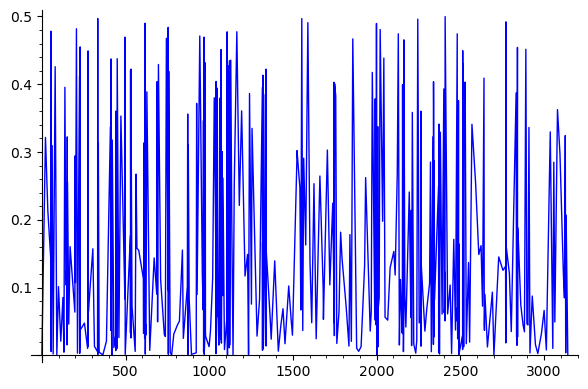

In [5]:
PL01

In [6]:
PL01.get_minmax_data()

{'xmin': 0.0,
 'xmax': 3141.592653589793,
 'ymin': 9.755760763043259e-17,
 'ymax': 0.49980392606980034}

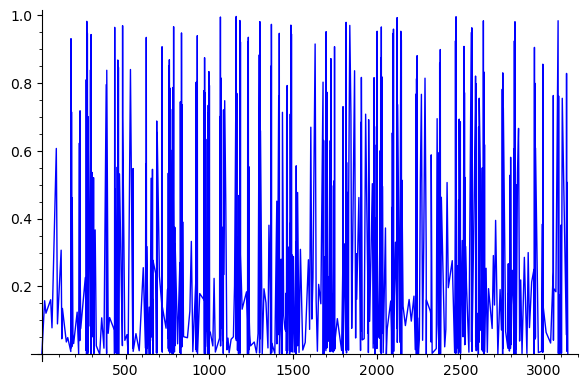

In [7]:
PL02


In [8]:
PL02.get_minmax_data()

{'xmin': 0.0,
 'xmax': 3141.592653589793,
 'ymin': 5.698642840029056e-17,
 'ymax': 0.9961323995828134}

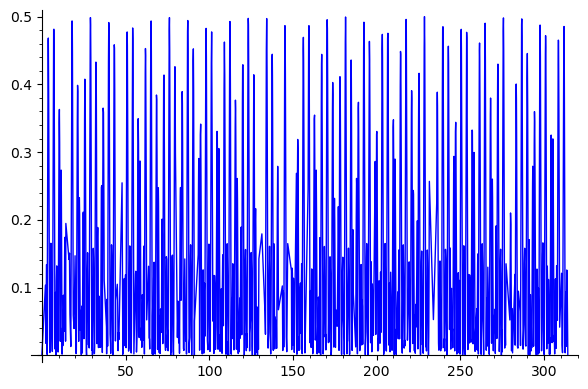

In [9]:
PL03

In [10]:
PL03.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 9.81283240642016e-17,
 'ymax': 0.4999452367198764}

In [11]:
################################################################################
# Function: sxyu                                                               #
#                                                                              #
# Purpose: calculate sigma_x^u or sigma_y^u                                    #
#                                                                              #
# Arguments:                                                                   #
#   u        integer     index for Pauli matrix                                # 
#   n        integer     total number of matrices                              # 
#   s        character   x or y to choose Pauli matrix                         # 
#                                                                              #
# Returns: matrix sigma_s^u                                                    #
#                                                                              #
################################################################################

def sxyu(u,n,s):
    # Sanity check
    if u > n-1:
        print("Invalid input: u > n-1")
        return
    # Pauli matrices
    SX = matrix([[0,1],[1,0]])
    SY = matrix([[0,-I],[I,0]])
    # Identity
    I2 = matrix([[1,0],[0,1]])
    # Choose which Pauli matrix to use
    S = SX if s == 'x' else SY
    # Compute tensor products
    j = 1
    if u == 0:
        M = S
        while j < n:
            M = M.tensor_product(I2)
            j += 1
    else:
        M = I2
        j = j + 1
        while j <= u:
            M = M.tensor_product(I2)
            j += 1
        M = M.tensor_product(S)
        while j < n:
            M = M.tensor_product(I2)
            j += j
    return M

In [12]:
K3 = np.matrix([[0, -1j, 1j],[1j, 0, -1j],[-1j, 1j, 0]])
K3=matrix(K3)

C4 = np.matrix([[0, -1j, 0, 1j],[1j, 0, -1j, 0],[0, 1j, 0, -1j],[-1j, 0, 1j, 0]])
C4 = matrix(C4) 

C4
W = K3.tensor_product(identity_matrix(4))+identity_matrix(3).tensor_product(C4)
W.round(3)

J4 = np. matrix([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
J4 = matrix(J4)
S = np.matrix([[0,-1j],[1j,0]])
S = matrix(S)
Y = identity_matrix(2).tensor_product(C4)+S.tensor_product(J4)
Y

[   0.0 -1.0*I    0.0  1.0*I -1.0*I -1.0*I -1.0*I -1.0*I]
[ 1.0*I    0.0 -1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I]
[   0.0  1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I -1.0*I]
[-1.0*I    0.0  1.0*I    0.0 -1.0*I -1.0*I -1.0*I -1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I    0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I  1.0*I    0.0 -1.0*I    0.0]
[ 1.0*I  1.0*I  1.0*I  1.0*I    0.0  1.0*I    0.0 -1.0*I]
[ 1.0*I  1.0*I  1.0*I  1.0*I -1.0*I    0.0  1.0*I    0.0]

In [13]:
################################################################################
# Function: H_theta                                                            #
#                                                                              #
# Purpose: Parametrize a Hamiltonian with theta                                #
#                                                                              #
# Arguments:                                                                   #
#   theta    float     angle to use in parametrization                         #
#                                                                              #
# Returns: Hamiltonian H = [[0,1,1],[1,0,e^{-i\theta}],[1,e^{i\theta},0]]      #
#                                                                              #
################################################################################

def H_theta(theta):
    return np.matrix([[0,1j,-1j],[-1j,0,exp(-1j*theta)],[1j,exp(1j*theta),0]])

In [14]:
# Creates adjacency matrix for corona product on K3 with n vertices
def coronak3(n):
    H = K3
    empty = matrix(n,n,0)
    corpartial = block_matrix([[H,0,0,0],[0,empty,0,0],[0,0,empty,0],[0,0,0,empty]])
    for i in range(n):
        corpartial=corpartial + \
                   matrix(3+3*n,3+3*n,{(3+i,0):1j, (0,3+i):-1j,(3+n+i,1):1j,(1,3+n+i):-1j,(3+2*n+i,2):1j,(2,3+2*n+i):-1j})
    return corpartial

In [15]:
V=coronak3(6) 
V = np.matrix(V)
V= matrix(V) ; V


21 x 21 dense matrix over Complex Double Field (use the '.str()' method to see the entries)

In [16]:
X,Y = linalg.eigh(V); X

array([-3.46410162e+00, -2.44948974e+00, -1.73205081e+00, -1.65705736e-16,
       -6.45819479e-17, -3.61945699e-17, -1.21403870e-17, -8.02916318e-18,
       -3.43550295e-18, -3.51607635e-20, -5.39260385e-33,  9.45794732e-19,
        2.51638010e-18,  5.70427316e-18,  1.03709793e-17,  2.95124740e-17,
        4.07143015e-17,  9.40791076e-17,  1.73205081e+00,  2.44948974e+00,
        3.46410162e+00])

In [17]:
PQ01=plot(transfer_at_time_a(V,x,0,1),0,100*np.pi)



In [18]:
PQ02=plot(transfer_at_time_a(V,x,0,2),0,100*np.pi)

In [19]:
PQ01.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 3.43597883565859e-16,
 'ymax': 0.9999772907672954}

In [20]:
PQ02.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 1.3668035872266421e-16,
 'ymax': 0.999227361906829}

In [21]:

def corquot(n):
    return np.matrix([[0,1,1,np.sqrt(n),0,0],[1,0,1j,0,np.sqrt(n),0],[1,-1j,0,0,0,np.sqrt(n)],[np.sqrt(n),0,0,0,0,0],[0,np.sqrt(n),0,0,0,0],[0,0,np.sqrt(n),0,0,0]])

In [22]:
CQ = corquot(147)
CQ01=plot(transfer_at_time_a(CQ,x,0,1),0,100*np.pi)
CQ01.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 6.938893903907228e-17,
 'ymax': 0.9919925008865141}

In [23]:
linalg.eigh(CQ)

(array([-13.02127118, -12.12435565, -11.28922038,  11.28922038,
         12.12435565,  13.02127118]),
 matrix([[-4.22541329e-01+0.00000000e+00j,
           4.08248290e-01+0.00000000e+00j,
          -3.93436346e-01+0.00000000e+00j,
          -3.93436346e-01+0.00000000e+00j,
           4.08248290e-01+0.00000000e+00j,
          -4.22541329e-01+0.00000000e+00j],
         [ 3.65931525e-01-2.11270665e-01j,
          -3.44169138e-15-4.08248290e-01j,
          -3.40725870e-01-1.96718173e-01j,
           3.40725870e-01-1.96718173e-01j,
          -9.99200722e-16-4.08248290e-01j,
          -3.65931525e-01-2.11270665e-01j],
         [ 3.65931525e-01+2.11270665e-01j,
           3.15719673e-16+4.08248290e-01j,
          -3.40725870e-01+1.96718173e-01j,
           3.40725870e-01+1.96718173e-01j,
           8.01442246e-16+4.08248290e-01j,
          -3.65931525e-01+2.11270665e-01j],
         [ 3.93436346e-01-5.55111512e-17j,
          -4.08248290e-01-1.66533454e-16j,
           4.22541329e-01-5.5511151

In [24]:
G = graphs.PathGraph(3)
P3=G.adjacency_matrix()
P3 = np.matrix(P3)
P3 = matrix(P3)


In [25]:

def coronaP3(n):
    H = P3
    empty = matrix(n,n,0)
    corpartial = block_matrix([[H,0,0],[0,empty,0],[0,0,empty]])
    for i in range(n):
        corpartial=corpartial + \
                   matrix(3+2*n,3+2*n,{(3+i,0):1, (0,3+i):1,(3+n+i,2):1,(2,3+n+i):1})
    return corpartial

In [26]:
CP3 = coronaP3(4) ; CP3

[0 1 0 1 1 1 1 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 1 1 1 1]
[1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0]

In [27]:
W,V = linalg.eigh(CP3) ; W

array([-2.44948974, -2.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  2.        ,
        2.44948974])

In [28]:
idempotents(K3)

([
[                          0.3333333333333338   -0.1666666666666667 + 0.2886751345948132*I -0.16666666666666677 - 0.28867513459481314*I]  [                          0.33333333333333315  0.3333333333333332 - 4.700061653689814e-17*I   0.3333333333333333 - 6.30253055900945e-17*I]  [                          0.3333333333333337 -0.16666666666666677 - 0.28867513459481287*I -0.16666666666666666 + 0.28867513459481303*I]
[  -0.1666666666666667 - 0.2886751345948132*I                           0.3333333333333335 -0.16666666666666688 + 0.28867513459481287*I]  [ 0.3333333333333332 + 4.700061653689814e-17*I                            0.3333333333333333 0.33333333333333337 - 1.602468905319636e-17*I]  [-0.16666666666666677 + 0.28867513459481287*I                          0.33333333333333304 -0.16666666666666655 - 0.28867513459481275*I]
[-0.16666666666666677 + 0.28867513459481314*I -0.16666666666666688 - 0.28867513459481287*I                           0.3333333333333334], [  0.3333333333333333 + 6.3

In [29]:
def P3quot(n): 
    K = matrix([[np.sqrt(n),0],[0,0],[0,np.sqrt(n)]])
    U = block_matrix([[P3,K],[K.transpose(),0]])
    return matrix(U) 

In [30]:
PP3 = P3quot(10)
P3_plot=plot(transfer_at_time_a(PP3,x,0,2),0,100*np.pi)
P3_plot.get_minmax_data()

{'xmin': 0.0,
 'xmax': 314.1592653589793,
 'ymin': 5.551115123125782e-17,
 'ymax': 0.9995629293462748}

In [51]:
x = var('x')
M = matrix([[1,1,1,1],[1,1,-1,-1],[1,-1,exp(I*x), -exp(I*x)],[1,-1,-exp(I*x),exp(I*x)]])
P = M/2
Tensor = P.tensor_product(P)
D = matrix([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,-np.pi,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,-x,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,-np.pi-x,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,6*np.pi,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,5*np.pi,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,6*np.pi - x,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,5*np.pi - x,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,4*np.pi,0,0,0,0,0,0,0],  [0,0,0,0,0,0,0,0,0,3*np.pi,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,4*np.pi - x,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,3*np.pi - x,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,2*np.pi,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,np.pi,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,2*np.pi - x,0], [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,np.pi - x ]]).transpose() 
H=Tensor*D*Tensor.inverse() ; H


[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       